<a href="https://colab.research.google.com/github/kstyle2198/NLP_TIPS/blob/main/%EC%98%81%EB%AC%B8_%EB%B0%8F_%ED%95%9C%EA%B8%80_Embeddings_and_%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B2%80%ED%86%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@manuktiwary/embeddings-and-distance-metrics-in-nlp-7a000c96d7db

# 한글 폰트 깨짐 예방

In [32]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# 영문 테스트

In [33]:
# ! pip install sentence_transformers
# ! pip install mplcursors

In [47]:
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity

# Sample text embedding model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [35]:
#Sentences we want to encode. Example:
sentence = ['The team enjoyed the hike through the meadow',
            'The team enjoyed the hike through the mountains',
            'The team has not enjoyed the hike through the meadows',
            'The national park had great views',
            'There were lot of rare animals in national park',
            'Olive oil drizzled over pizza tastes delicious']

In [36]:
#Sentences are encoded by calling model.encode()
embedding = model.encode(sentence)

#Preview the embeddings

print(embedding)

# As we can see embeddings are nothing but
# numerical representation of sentences in a vector form

[[ 0.37061945  0.26414236  0.21265689 ...  0.14994559 -0.25794917
  -0.23970766]
 [-0.0764571   0.27122676 -0.04530105 ... -0.2731907  -0.60024995
  -0.30255508]
 [ 0.35693607 -0.23314427  0.4180024  ... -0.37369522 -0.10241958
  -0.03282999]
 [ 0.6693323   0.4009496  -0.4820837  ...  0.10645889 -1.5067161
  -0.01547351]
 [ 0.43396205  0.2323564   0.21751331 ... -0.5746393  -0.26438487
   0.49265498]
 [-0.2655592   0.11172356 -0.1473306  ...  0.42197457  0.8839461
   0.10763907]]


In [37]:
# as we can see the embeddings has shape of (6,384)
# where 6 is not of sentences passed and 384 is the
# dimension of embedding model
embedding.shape

(6, 384)

In [ ]:
similarities = util.cos_sim(embedding, embedding) # compute similarity between sentence vectors
similarities

In [38]:
# Now we will try to decompose high dimensional embeddings
# from 384 to 2 so that we can plot it and visualize
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embedding)
new_embeddings = PCA_model.transform(embedding)

# As we can see now the shape has changed from (6,384)->(6,2)
new_embeddings.shape

(6, 2)

In [39]:
# Below is a utility function in order to create a 2d plot
# for the sentences and embeddings passed

import matplotlib.pyplot as plt
import mplcursors

def plot2d(x_values, y_values, text_labels):
    """
    Create a 2D plot with annotations.

    Parameters:
    - x_values (array): X-axis values.
    - y_values (array): Y-axis values.
    - text_labels (list): List of text labels for each point.
    """
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values, y_values, label='Data Points')

    # Annotate points with text labels
    for i, label in enumerate(text_labels):
        ax.annotate(label, (x_values[i], y_values[i]))

    mplcursors.cursor(hover=True)

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('2D Plot with Annotations')

    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


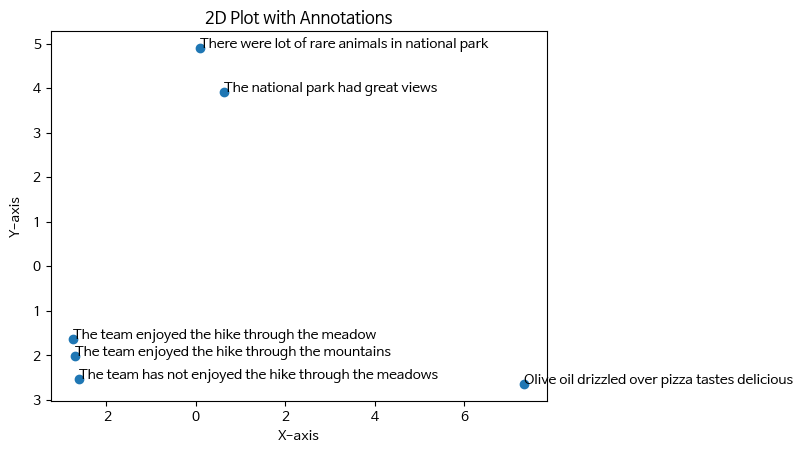

In [40]:
import matplotlib.pyplot as plt
import mplcursors
plt.rc('font', family='NanumBarunGothic')

# pass the embeddings and original sentence to create labels
plot2d(new_embeddings[:,0], new_embeddings[:,1], sentence)

# 한글 실험

In [41]:
model = SentenceTransformer('jhgan/ko-sroberta-multitask')

In [42]:
#Sentences we want to encode. Example:
sentence = ['오늘까지 프리젠테이션 발표자료를 준비해야 합니다.',
            '어제 늦은 밤까지 자료 검토하느라 야근을 했습니다.',
            '오늘 미팅은 오전과 오후에 이어져 실시될 예정입니다.',
            '주말에는 에버랜드에 놀러갈 것입니다.',
            '남산 공원에는 많은 사람들이 봄의 정취를 느끼기 위해 나들이 중입니다.',
            '주말에는 축구경기를 관람할 예정입니다.']

In [43]:
embedding = model.encode(sentence)
print(embedding)

[[ 0.5044217  -0.16391529 -0.18027961 ...  0.05289795  0.6587569
  -0.06064973]
 [-0.36689788  0.04789757 -0.7643253  ...  0.16767496 -0.01679009
   0.06390907]
 [-0.56173307 -0.27650097  0.1998772  ... -0.38807762  0.04857861
   0.24930242]
 [-0.7858042  -0.3848879   0.15750475 ...  0.17705254 -0.5039169
   0.6117323 ]
 [-0.1559971  -0.41132027 -0.13137533 ... -0.33996776 -0.51501817
  -0.27492175]
 [-0.4736164   0.12529875  0.15561439 ...  0.45471472 -0.6783069
   0.22491239]]


In [44]:
embedding.shape

(6, 768)

In [45]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embedding)
new_embeddings = PCA_model.transform(embedding)

# As we can see now the shape has changed from (6,384)->(6,2)
new_embeddings.shape

(6, 2)

In [48]:
similarities = util.cos_sim(embedding, embedding) # compute similarity between sentence vectors
similarities

tensor([[1.0000, 0.3044, 0.4532, 0.1007, 0.0569, 0.1794],
        [0.3044, 1.0000, 0.2065, 0.0709, 0.0838, 0.1863],
        [0.4532, 0.2065, 1.0000, 0.1366, 0.2420, 0.3002],
        [0.1007, 0.0709, 0.1366, 1.0000, 0.3040, 0.4241],
        [0.0569, 0.0838, 0.2420, 0.3040, 1.0000, 0.2280],
        [0.1794, 0.1863, 0.3002, 0.4241, 0.2280, 1.0000]])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


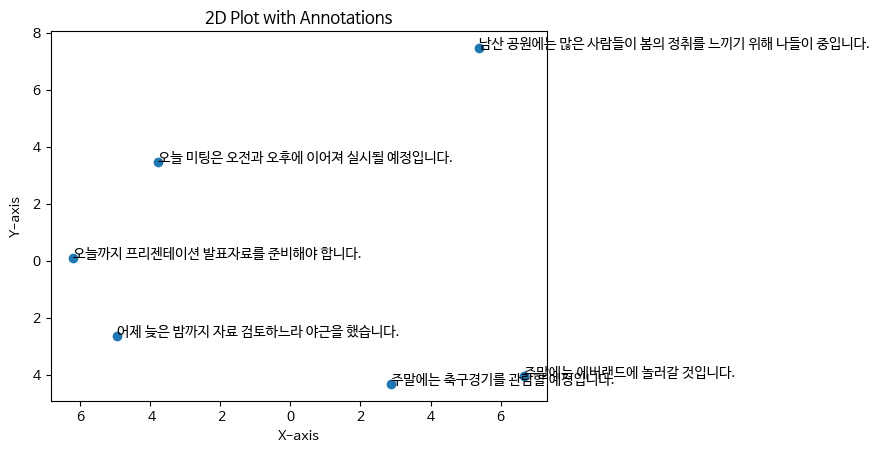

In [46]:
# pass the embeddings and original sentence to create labels
plot2d(new_embeddings[:,0], new_embeddings[:,1], sentence)